In [2]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [4]:
cd '/content/gdrive/My Drive/Real_time_HW3'

/content/gdrive/My Drive/Real_time_HW3


In [5]:
import torch
import torchvision
import torchvision.datasets as datasets
from torch import nn

In [6]:
import collections
import math
import os
import shutil
import pandas as pd
import torch
import torchvision
from torch import nn


In [7]:
pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install --upgrade d2l==1.0.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:

pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from d2l import torch as d2l

In [11]:
import torchvision.transforms as transforms

In [12]:
data_dir = './data' 
transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor(),transforms.Resize(64)])
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle=True)
testset = torchvision.datasets.CIFAR10(root=data_dir, train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [13]:

print(len(trainset))
sample = next(iter(trainset))
print(len(sample))
image, label = sample
print(type(image))
print(type(label))
image.shape
print(len(testset))

50000
2
<class 'torch.Tensor'>
<class 'int'>
10000


bird


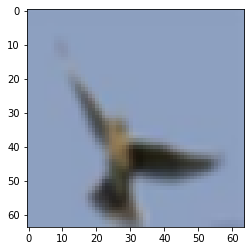

truck


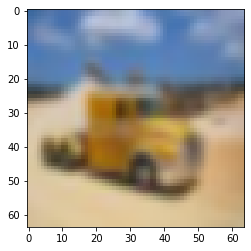

frog


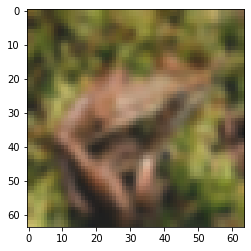

ship


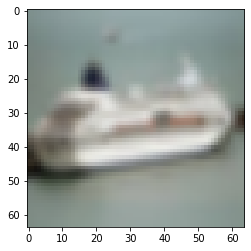

bird


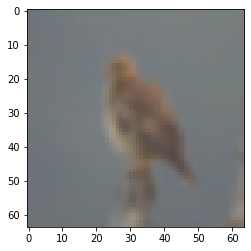

cat


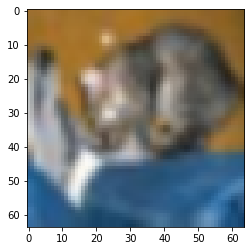

ship


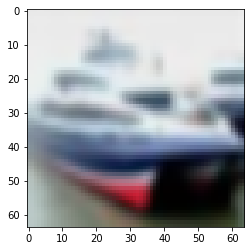

ship


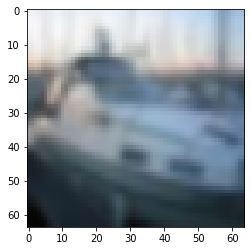

plane


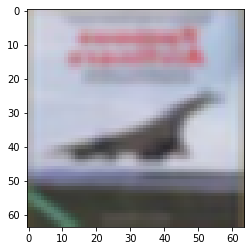

frog


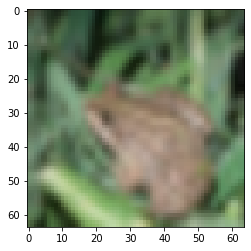

In [14]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(train_loader)
batch = next(dataiter)
labels = batch[1][0:5]
images = batch[0][0:5]
for i in range(5):
    print(classes[labels[i]])
    image = images[i].numpy()
    plt.imshow(np.rot90(image.T, k=3))
    plt.show()

dataiter = iter(test_loader)
batch = next(dataiter)
labels = batch[1][0:5]
images = batch[0][0:5]
for i in range(5):
    print(classes[labels[i]])
    image = images[i].numpy()
    plt.imshow(np.rot90(image.T, k=3))
    plt.show()

In [15]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.LazyBatchNorm2d())
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [16]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [17]:
#VGG11
model = VGG(arch=((1, 64), (1, 128),(2, 256), (2, 512), (2, 512)), lr=0.01)


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [18]:
import torch.optim as optim

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [20]:
device = 'cuda' 
model.to(device)

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, 

1,  2000| loss: 1.867
1,  4000| loss: 1.570
1,  6000| loss: 1.407
1,  8000| loss: 1.271
1, 10000| loss: 1.192
2,  2000| loss: 1.084
2,  4000| loss: 1.020
2,  6000| loss: 0.962
2,  8000| loss: 0.916
2, 10000| loss: 0.896
3,  2000| loss: 0.816
3,  4000| loss: 0.805
3,  6000| loss: 0.787
3,  8000| loss: 0.775
3, 10000| loss: 0.728
4,  2000| loss: 0.686
4,  4000| loss: 0.666
4,  6000| loss: 0.653
4,  8000| loss: 0.661
4, 10000| loss: 0.645
5,  2000| loss: 0.584
5,  4000| loss: 0.590
5,  6000| loss: 0.594
5,  8000| loss: 0.563
5, 10000| loss: 0.565
6,  2000| loss: 0.499
6,  4000| loss: 0.530
6,  6000| loss: 0.493
6,  8000| loss: 0.502
6, 10000| loss: 0.498
7,  2000| loss: 0.470
7,  4000| loss: 0.427
7,  6000| loss: 0.454
7,  8000| loss: 0.448
7, 10000| loss: 0.443
8,  2000| loss: 0.391
8,  4000| loss: 0.402
8,  6000| loss: 0.395
8,  8000| loss: 0.395
8, 10000| loss: 0.405
9,  2000| loss: 0.345
9,  4000| loss: 0.372
9,  6000| loss: 0.352
9,  8000| loss: 0.364
9, 10000| loss: 0.365
10,  2000|

Text(0.5, 1.0, 'Convergence of Loss')

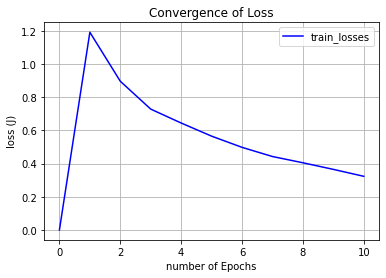

In [21]:
epoch_losses = [] 
model.train()
n_epochs=10
train_losses = np.zeros(n_epochs+1)
val_losses = np.zeros(n_epochs+1)
for epoch in range(n_epochs):
    
    running_loss = 0.0
    saved_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        

        loss.backward()
        optimizer.step()
       


       
        running_loss += loss.item()
        train_losses[epoch+1]=running_loss/2000
        if i % 2000 == 1999:  
            print('%d, %5d| loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            saved_loss = running_loss
            running_loss = 0.0

    epoch_losses.append(saved_loss/10000)
    


plt.plot(train_losses, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.legend(['train_losses', 'val_losses'])
plt.grid()
plt.xlabel('number of Epochs')
plt.ylabel('loss (J)')
plt.title('Convergence of Loss') 
   

In [23]:
total = 0
correct = 0
model.eval() 
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Model Accuracy: %d %%' % (100 * correct / total))

Model Accuracy: 86 %


In [24]:
pip install ptflops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
sum([param.nelement() for param in model.parameters()])

34440970

In [26]:
pip install --upgrade git+https://github.com/sovrasov/flops-counter.pytorch.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sovrasov/flops-counter.pytorch.git to /tmp/pip-req-build-1v70p2s6
  Running command git clone --filter=blob:none --quiet https://github.com/sovrasov/flops-counter.pytorch.git /tmp/pip-req-build-1v70p2s6
  Resolved https://github.com/sovrasov/flops-counter.pytorch.git to commit 64a8dbdfb8cd85d1d7bb1d3f7237b8eafec78005
  Preparing metadata (setup.py) ... done


In [27]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = model
  macs, params = get_model_complexity_info(net, (3, 64, 64), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

VGG(
  34.44 M, 100.000% Params, 639.21 MMac, 100.000% MACs, 
  (net): Sequential(
    34.44 M, 100.000% Params, 639.21 MMac, 100.000% MACs, 
    (0): Sequential(
      1.92 k, 0.006% Params, 8.39 MMac, 1.312% MACs, 
      (0): Conv2d(1.79 k, 0.005% Params, 7.34 MMac, 1.148% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, 0.000% Params, 524.29 KMac, 0.082% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(0, 0.000% Params, 262.14 KMac, 0.041% MACs, )
      (3): MaxPool2d(0, 0.000% Params, 262.14 KMac, 0.041% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      74.11 k, 0.215% Params, 76.15 MMac, 11.914% MACs, 
      (0): Conv2d(73.86 k, 0.214% Params, 75.63 MMac, 11.832% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, 0.001% Params, 262.14 KMac, 0.041% MACs, 128, eps=1e-05, momentum=0.1, affine=True, track_r